In [244]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust
import warnings
warnings.filterwarnings('ignore')

In [241]:
#loading the dataset
data=pd.read_csv('/home/akash/Downloads/haberman.csv')

In [199]:
# no. of data points and features
data.shape

(306, 4)

In [200]:
#name of features or columns in the dataset
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


This dataset does not have names to it's colums hence, the top row is retured.
So as per the dataset description I've explicitly defined the attributes in the csv file as:

1. Age of the patient at the time of operation (Age)
2. Patient's year of operation (Year)
3. Number of Positive auxillary nodes detected (Nodes)
4. Survival status (Status)

    --    1 => The patient survived 5 years or longer
    
    --    2 => The patient died within 5 years.

In [201]:
#  checking the columns again
print(data.columns)

Index(['age', 'year', 'nodes', 'status'], dtype='object')


In [248]:
# checking the data points of each of the two classes
print(data["status"].value_counts())

"1"    225
"2"     81
Name: status, dtype: int64


Hence, it is clear that it is not balanced.

# 2-D Scatter plot

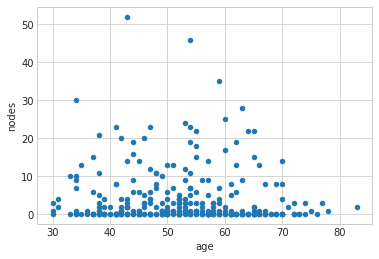

In [203]:
# 2D scatter plot between the attributes age and nodes
#x axis = age
#y axis = nodes

data.plot(kind='scatter', x='age', y='nodes')
plt.show()


To get more clarity, let us colour them differently so as to be able two classify them

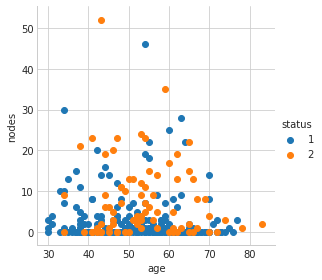

In [204]:
#hence, colour coding with respect to the class a particular instance belongs to 
#using seaborn

sns.set_style('whitegrid')
sns.FacetGrid(data, hue='status',size=4)\
   .map(plt.scatter, 'age','nodes')\
   .add_legend()
plt.show()


Now here, it is very much clear that these instances can't be separated easily.
Let's try to generate pairplots
Since, there are 3 features namely age, year and nodes hence, 3C2 = 3 combinations of such pair plots will exist.

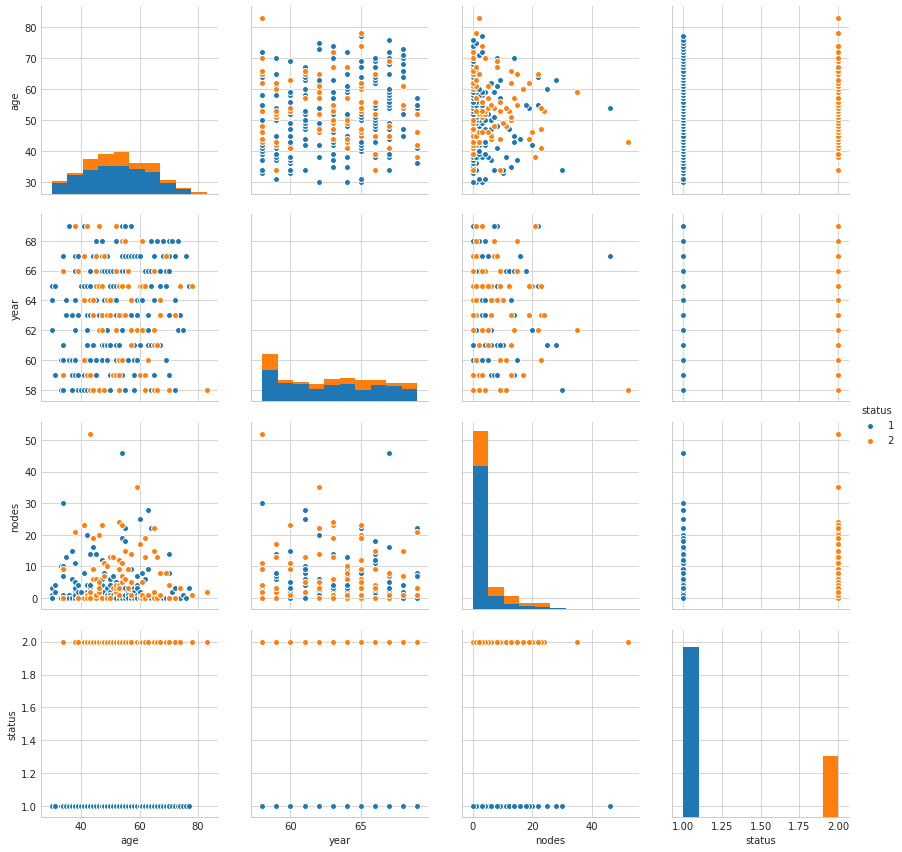

In [205]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', size=3)
plt.show()

This dataset had the classes in numerical form hence, I was getting 16 pair plots('status' was also includes as attribute).
Hence I explicitly converted that complete column into string.
and then,


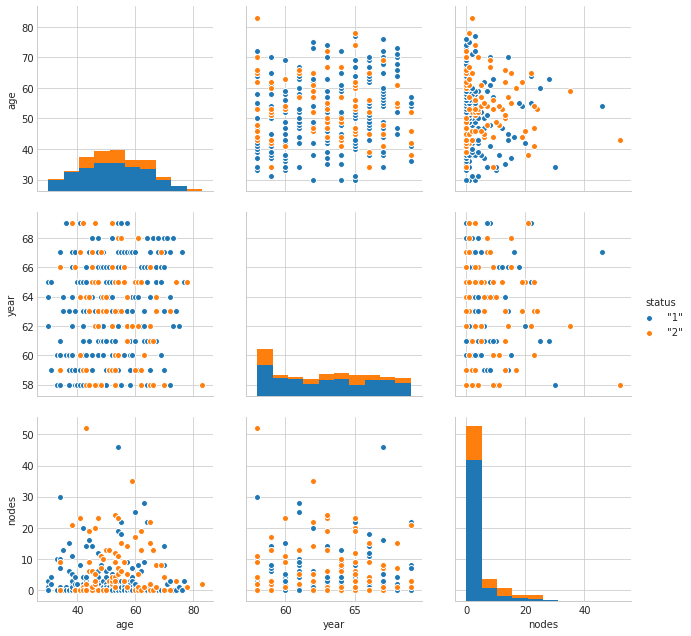

In [242]:
plt.close()
sns.set_style('whitegrid')
sns.pairplot(data, hue='status', size=3)
plt.show()


# Observations
It can be clearly seen that not a single comparison help in clearly classifying the two classes.

It is not an easy classification that could be carried out by putting if else condition and setting up a boundry.

Now let us look at the 1 Dimensional scatter plots

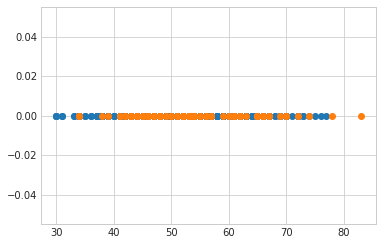

In [206]:
data_1 = data.loc[data["status"] == 1]
data_2 = data.loc[data["status"] == 2]

plt.plot(data_1['age'], np.zeros_like(data_1['age']),'o')
plt.plot(data_2['age'], np.zeros_like(data_2['age']),'o')
plt.show()

Here, we can see that on the x- axis from approximately 40 to somewhere near 58 it is exclusively class "2". But we can't say that we can clasiify our data points from this plot because it is still messed up. a lot of data points are overlapping each other.

# Histogram

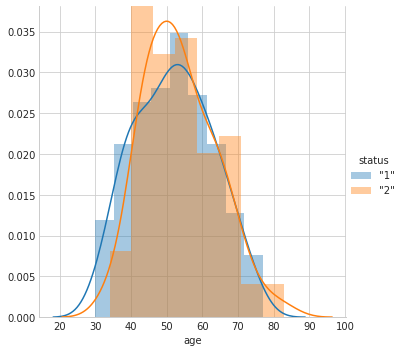

In [245]:
#for age
sns.FacetGrid(data,hue='status',size=5)\
   .map(sns.distplot, 'age')\
   .add_legend()

plt.show()

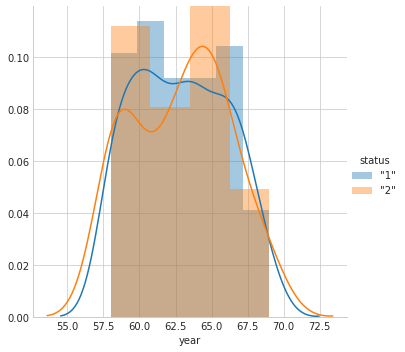

In [246]:
#for year
sns.FacetGrid(data, hue='status', size=5)\
   .map(sns.distplot, 'year')\
   .add_legend()
plt.show()

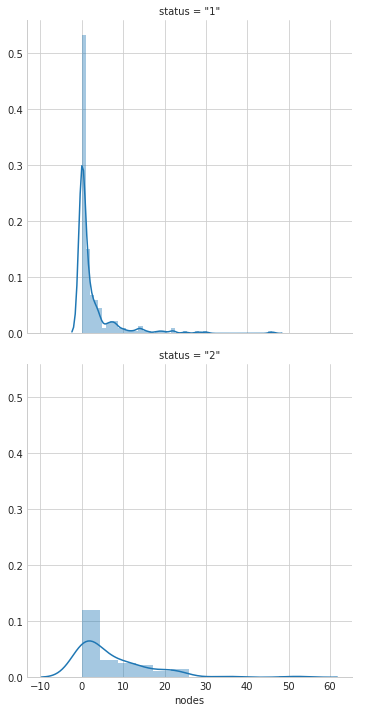

In [247]:
#for np. of nodes
sns.FacetGrid(data, 'status', size=5)\
   .map(sns.distplot, 'nodes')\
   .add_legend()
plt.show()

The histogram too is not able to distinguish in these two classes properly. There is a lot of overlap.
The lines joining these histograms denotes the Probablity density function.

I don't clearly know why I have two different histograms for the attribute 'nodes' but I suppose it is due to the fact that this attribute has only a few discrete values, and most of them are zeros. And we already had seen that the number of instances classified into class 1 were significantly more than the number of instances classified into class 2.

# CDF [cumulative density function]

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


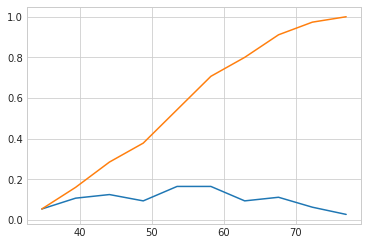

In [210]:
counts, bin_edges = np.histogram(data_1['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)

plt.show()

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]
[0.03703704 0.12345679 0.19753086 0.19753086 0.13580247 0.12345679
 0.09876543 0.04938272 0.02469136 0.01234568]
[34.  38.9 43.8 48.7 53.6 58.5 63.4 68.3 73.2 78.1 83. ]


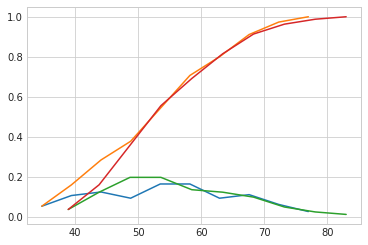

In [211]:
#cdf for both the classes 1 and 2 for the age at which the surgery was performed

#1
counts, bin_edges=np.histogram(data_1['age'], bins=10, density=True)
pdf=counts/(sum(counts))
print(pdf)
print(bin_edges)
#CDF
cdf=np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:],cdf)

#2
counts, bin_edges = np.histogram(data_2['age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf)
print(bin_edges)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf)
plt.plot(bin_edges[1:], cdf)


plt.show();


Mean, Variance and Standard deviation

In [232]:
print("Mean:")
print(np.mean(data_1["age"]))
print(np.mean(data_2["age"]))

print("\nStd-dev:");
print(np.std(data_1["age"]))
print(np.std(data_2["age"]))


Mean:
52.01777777777778
53.67901234567901

Std-dev:
10.98765547510051
10.10418219303131


Median, quantiles, percentiles and IQR.

In [234]:

print("\nMedians:")
print(np.median(data_1["age"]))
print(np.median(data_2["age"]))


print("\nQuantiles:")
print(np.percentile(data_1["age"],np.arange(0, 100, 25)))
print(np.percentile(data_2["age"],np.arange(0, 100, 25)))

print("\n90th Percentiles:")
print(np.percentile(data_1["age"],90))
print(np.percentile(data_2["age"],90))


print ("\nMedian Absolute Deviation")
print(robust.mad(data_1["age"]))
print(robust.mad(data_2["age"]))


Medians:
52.0
53.0

Quantiles:
[30. 43. 52. 60.]
[34. 46. 53. 61.]

90th Percentiles:
67.0
67.0

Median Absolute Deviation
13.343419966550417
11.860817748044816


# Box Plot

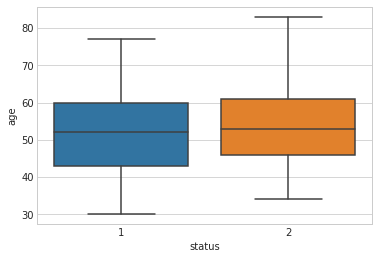

In [235]:
sns.boxplot(x='status', y='age',data=data)
plt.show()

# Violin Plot

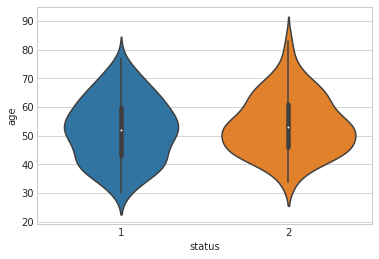

In [236]:
sns.violinplot(x='status', y='age', data=data)
plt.show()

# Contour plot

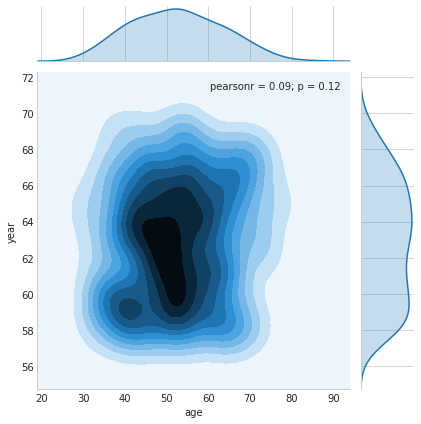

In [243]:
sns.jointplot(x='age',y='year',data=data, kind='kde')
plt.show()

# Observations

For this particular dataset it was difficult to diffrentiate betweent the data points using the above plots.

May be it is due to the fact that there was no pattern in the survival of the patients, a younger person died within 5 years with no nodes but some elderly person survived for more than 5 years even after having positive auxillary nodes.